In [1]:
#import numpy as np 
import pandas as pd 
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import mean

In [2]:
#parameters 
n_steps = 3
units = 100 
layers = 3
drop = 0.2
epochs = 2000
batch_size = 10
optimizer = 'adam'
dim_test = 5

In [3]:
"""PART1 - DATA PROCESSING"""

#import dataset
df = pd.read_csv('/home/luis/workspace/covid_visualization/extra_files/dataset.csv')
X = df.iloc[:,0:5]  #Guarda a partir da coluna 3 (4) até a penultima

X = X.groupby(['week_predicton'])['last_week_cases'].agg('sum')
X = pd.DataFrame(X)
sc = MinMaxScaler(feature_range = (0,1)) 
X = sc.fit_transform(X)
print(X)
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = n_steps
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
#for i in range(len(X)):
    #print(X[i], y[i])

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_test = X[-dim_test:]
y_test = y[-dim_test:]
X = X[:-dim_test]
y = y[:-dim_test]
print(X)




[[0.00000000e+00]
 [1.88831308e-07]
 [7.55325232e-07]
 [6.79792709e-06]
 [2.07714439e-05]
 [2.00161186e-05]
 [1.69948177e-05]
 [2.51712133e-04]
 [1.04876908e-03]
 [2.82076208e-03]
 [9.67514972e-03]
 [2.68112133e-02]
 [4.89080641e-02]
 [5.82261338e-02]
 [5.99724457e-02]
 [6.01780830e-02]
 [6.45655785e-02]
 [6.52323418e-02]
 [7.57149342e-02]
 [8.20847807e-02]
 [9.66415974e-02]
 [1.11095501e-01]
 [1.23523622e-01]
 [1.36059566e-01]
 [1.55323570e-01]
 [1.65303682e-01]
 [1.79869185e-01]
 [1.89495428e-01]
 [2.04013534e-01]
 [2.38515280e-01]
 [2.57023014e-01]
 [2.67432718e-01]
 [2.78139264e-01]
 [2.73739872e-01]
 [2.86957875e-01]
 [3.05198413e-01]
 [3.13891828e-01]
 [3.30684597e-01]
 [3.30643054e-01]
 [3.30585082e-01]
 [3.66930955e-01]
 [3.97828478e-01]
 [4.75218346e-01]
 [5.27794836e-01]
 [5.70664074e-01]
 [5.48587617e-01]
 [5.26577251e-01]
 [5.22321749e-01]
 [5.15543271e-01]
 [5.21272602e-01]
 [5.40686160e-01]
 [5.19327640e-01]
 [5.01994247e-01]
 [6.44311872e-01]
 [5.91985206e-01]
 [5.447679

In [4]:
"""PART2 - BUILDING THE LSTM"""

# Adding the first LSTM layer and some dropout regularization
model = Sequential()
model.add(LSTM(units = units, return_sequences = True, input_shape=(n_steps, n_features)))
model.add(Dropout(drop))

# Adding the second LSTM layer and some dropout regularization
i = 0
while i < layers:
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(drop))
    i += 1

model.add(LSTM(units = units, return_sequences = False))
model.add(Dropout(drop))

#Adding the output layer 
model.add(Dense(units = 1))





In [5]:
"""Part3 - Training The LSTM """

# Compiling the RNN 
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

#Fitting the RNN to Training set

history = model.fit(X, y, epochs = epochs, batch_size = batch_size)


Epoch 1/2000
7/7 [==============================] - 0s 33ms/step - loss: 0.1262
Epoch 2/2000
7/7 [==============================] - 0s 38ms/step - loss: 0.0710
Epoch 3/2000
7/7 [==============================] - 0s 32ms/step - loss: 0.0477
Epoch 4/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0401
Epoch 5/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0271
Epoch 6/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0179
Epoch 7/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0150
Epoch 8/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0101
Epoch 9/2000
7/7 [==============================] - 0s 42ms/step - loss: 0.0053
Epoch 10/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0064
Epoch 11/2000
7/7 [==============================] - 0s 28ms/step - loss: 0.0078
Epoch 12/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.0077
Epoch 13/2000
7/7 [==================

7/7 [==============================] - 0s 30ms/step - loss: 0.0034
Epoch 203/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0029
Epoch 204/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0029
Epoch 205/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0046
Epoch 206/2000
7/7 [==============================] - 0s 31ms/step - loss: 0.0028
Epoch 207/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0030
Epoch 208/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0031
Epoch 209/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0024
Epoch 210/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0022
Epoch 211/2000
7/7 [==============================] - 0s 35ms/step - loss: 0.0030
Epoch 212/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0021
Epoch 213/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 214/2000
7/7 [===========

7/7 [==============================] - 0s 20ms/step - loss: 0.0051
Epoch 303/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.0024
Epoch 304/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0028
Epoch 305/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.0029
Epoch 306/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0027
Epoch 307/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.0028
Epoch 308/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0025
Epoch 309/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0027
Epoch 310/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 311/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 312/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 313/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 314/2000
7/7 [===========

7/7 [==============================] - 0s 32ms/step - loss: 0.0015
Epoch 403/2000
7/7 [==============================] - 0s 35ms/step - loss: 0.0020
Epoch 404/2000
7/7 [==============================] - 0s 33ms/step - loss: 0.0023
Epoch 405/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0013
Epoch 406/2000
7/7 [==============================] - 0s 30ms/step - loss: 0.0025
Epoch 407/2000
7/7 [==============================] - 0s 31ms/step - loss: 0.0028
Epoch 408/2000
7/7 [==============================] - 0s 31ms/step - loss: 0.0021
Epoch 409/2000
7/7 [==============================] - 0s 54ms/step - loss: 0.0023
Epoch 410/2000
7/7 [==============================] - 0s 52ms/step - loss: 0.0014
Epoch 411/2000
7/7 [==============================] - 0s 34ms/step - loss: 0.0021
Epoch 412/2000
7/7 [==============================] - 0s 38ms/step - loss: 0.0017
Epoch 413/2000
7/7 [==============================] - 0s 49ms/step - loss: 0.0026
Epoch 414/2000
7/7 [===========

7/7 [==============================] - 0s 27ms/step - loss: 0.0022
Epoch 503/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0021
Epoch 504/2000
7/7 [==============================] - 0s 28ms/step - loss: 0.0013
Epoch 505/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 506/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0026
Epoch 507/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 508/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.0019
Epoch 509/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 510/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 511/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 512/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.0012
Epoch 513/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.0018
Epoch 514/2000
7/7 [===========

7/7 [==============================] - 0s 27ms/step - loss: 0.0022
Epoch 603/2000
7/7 [==============================] - 0s 39ms/step - loss: 0.0017
Epoch 604/2000
7/7 [==============================] - 0s 45ms/step - loss: 0.0025
Epoch 605/2000
7/7 [==============================] - 0s 44ms/step - loss: 0.0015
Epoch 606/2000
7/7 [==============================] - 0s 34ms/step - loss: 0.0015
Epoch 607/2000
7/7 [==============================] - 0s 30ms/step - loss: 0.0018
Epoch 608/2000
7/7 [==============================] - 0s 57ms/step - loss: 0.0027
Epoch 609/2000
7/7 [==============================] - 0s 48ms/step - loss: 0.0020
Epoch 610/2000
7/7 [==============================] - 0s 46ms/step - loss: 0.0022
Epoch 611/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0019
Epoch 612/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 613/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.0015
Epoch 614/2000
7/7 [===========

7/7 [==============================] - 0s 28ms/step - loss: 0.0021
Epoch 703/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0017
Epoch 704/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0017
Epoch 705/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 706/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 707/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 708/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 709/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 710/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 711/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 712/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.0022
Epoch 713/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0013
Epoch 714/2000
7/7 [===========

7/7 [==============================] - 0s 29ms/step - loss: 0.0015
Epoch 803/2000
7/7 [==============================] - 0s 35ms/step - loss: 0.0017
Epoch 804/2000
7/7 [==============================] - 0s 33ms/step - loss: 0.0016
Epoch 805/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0015
Epoch 806/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.0014
Epoch 807/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 808/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0019
Epoch 809/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0015
Epoch 810/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 811/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 812/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 813/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.0017
Epoch 814/2000
7/7 [===========

7/7 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 903/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 904/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.0018
Epoch 905/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 906/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0014
Epoch 907/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 908/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 909/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.0011
Epoch 910/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 911/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.0019
Epoch 912/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0021
Epoch 913/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 914/2000
7/7 [===========

7/7 [==============================] - 0s 32ms/step - loss: 0.0017
Epoch 1003/2000
7/7 [==============================] - 0s 31ms/step - loss: 0.0014
Epoch 1004/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0015
Epoch 1005/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0016
Epoch 1006/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0014
Epoch 1007/2000
7/7 [==============================] - 0s 33ms/step - loss: 0.0020
Epoch 1008/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0018
Epoch 1009/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.0019
Epoch 1010/2000
7/7 [==============================] - 0s 31ms/step - loss: 0.0019
Epoch 1011/2000
7/7 [==============================] - 0s 28ms/step - loss: 0.0021
Epoch 1012/2000
7/7 [==============================] - 0s 34ms/step - loss: 0.0022
Epoch 1013/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 1014/2000
7/7 

7/7 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 1199/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 1200/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.0015
Epoch 1201/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 1202/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 1203/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 1204/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 1205/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.0020
Epoch 1206/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 1207/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 1208/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 1209/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 1210/2000
7/7 

7/7 [==============================] - 1s 100ms/step - loss: 0.0017
Epoch 1395/2000
7/7 [==============================] - 1s 108ms/step - loss: 0.0018
Epoch 1396/2000
7/7 [==============================] - 1s 93ms/step - loss: 0.0011
Epoch 1397/2000
7/7 [==============================] - 0s 70ms/step - loss: 0.0012
Epoch 1398/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.0014
Epoch 1399/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.0012
Epoch 1400/2000
7/7 [==============================] - 0s 71ms/step - loss: 0.0015
Epoch 1401/2000
7/7 [==============================] - 1s 93ms/step - loss: 0.0021
Epoch 1402/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.0015
Epoch 1403/2000
7/7 [==============================] - 0s 68ms/step - loss: 0.0012
Epoch 1404/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.0018
Epoch 1405/2000
7/7 [==============================] - 0s 63ms/step - loss: 0.0019
Epoch 1406/2000
7/

7/7 [==============================] - 0s 63ms/step - loss: 0.0011
Epoch 1591/2000
7/7 [==============================] - 0s 55ms/step - loss: 0.0018
Epoch 1592/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.0015
Epoch 1593/2000
7/7 [==============================] - 0s 67ms/step - loss: 9.9599e-04
Epoch 1594/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.0013
Epoch 1595/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.0012
Epoch 1596/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.0011
Epoch 1597/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.0015
Epoch 1598/2000
7/7 [==============================] - 0s 65ms/step - loss: 0.0015
Epoch 1599/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.0012
Epoch 1600/2000
7/7 [==============================] - 0s 55ms/step - loss: 0.0011
Epoch 1601/2000
7/7 [==============================] - 0s 51ms/step - loss: 0.0012
Epoch 1602/2000


7/7 [==============================] - 0s 68ms/step - loss: 0.0013
Epoch 1787/2000
7/7 [==============================] - 0s 69ms/step - loss: 0.0014
Epoch 1788/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.0015
Epoch 1789/2000
7/7 [==============================] - 1s 92ms/step - loss: 0.0011
Epoch 1790/2000
7/7 [==============================] - 0s 61ms/step - loss: 0.0014
Epoch 1791/2000
7/7 [==============================] - 0s 58ms/step - loss: 0.0011
Epoch 1792/2000
7/7 [==============================] - 0s 57ms/step - loss: 0.0015
Epoch 1793/2000
7/7 [==============================] - 0s 66ms/step - loss: 0.0011
Epoch 1794/2000
7/7 [==============================] - 1s 111ms/step - loss: 0.0013
Epoch 1795/2000
7/7 [==============================] - 1s 103ms/step - loss: 0.0012
Epoch 1796/2000
7/7 [==============================] - 1s 98ms/step - loss: 0.0011
Epoch 1797/2000
7/7 [==============================] - 0s 54ms/step - loss: 0.0015
Epoch 1798/2000
7/

7/7 [==============================] - 0s 69ms/step - loss: 9.0487e-04
Epoch 1983/2000
7/7 [==============================] - 1s 74ms/step - loss: 0.0013
Epoch 1984/2000
7/7 [==============================] - 0s 67ms/step - loss: 0.0012
Epoch 1985/2000
7/7 [==============================] - 0s 55ms/step - loss: 0.0013
Epoch 1986/2000
7/7 [==============================] - 0s 70ms/step - loss: 0.0011
Epoch 1987/2000
7/7 [==============================] - 0s 71ms/step - loss: 0.0010
Epoch 1988/2000
7/7 [==============================] - 1s 92ms/step - loss: 9.9753e-04
Epoch 1989/2000
7/7 [==============================] - 0s 60ms/step - loss: 0.0013
Epoch 1990/2000
7/7 [==============================] - 0s 67ms/step - loss: 0.0014
Epoch 1991/2000
7/7 [==============================] - 0s 63ms/step - loss: 9.6413e-04
Epoch 1992/2000
7/7 [==============================] - 0s 69ms/step - loss: 0.0015
Epoch 1993/2000
7/7 [==============================] - 0s 67ms/step - loss: 0.0013
Epoch 19

In [6]:
print(min(history.history['loss']))

0.0007698102272115648


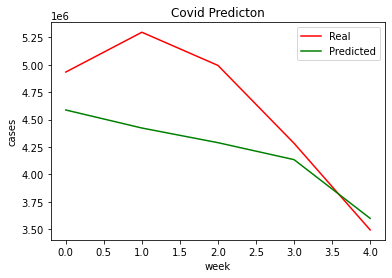

[2.81914832e+11]


In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y_test = sc.inverse_transform(y_test)
# Vizualizing the Results
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted')
plt.title('Covid Predicton')
plt.xlabel('week')
plt.ylabel('cases')
plt.legend()
plt.show()

print(abs(sum((predicted_stock_price-y_test)**2)/dim_test))